In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("all_movie_the_number.csv")
print(df.describe())

             month         year        budget      runtime      screens  \
count  5953.000000  6235.000000  3.417000e+03  5518.000000  4316.000000   
mean      6.685705  2012.174499  4.588989e+07   109.371874  1782.065802   
std       3.524896     6.046952  4.993977e+07    19.504543  1451.971328   
min       1.000000  2000.000000  6.500000e+04    32.000000     1.000000   
25%       4.000000  2007.000000  1.300000e+07    96.000000    29.000000   
50%       7.000000  2013.000000  2.900000e+07   107.000000  2160.000000   
75%      10.000000  2017.000000  6.000000e+07   120.000000  3022.000000   
max      12.000000  2024.000000  4.000000e+08   240.000000  4725.000000   

       opening_week  domestic_box_office  international_box_office  \
count  4.309000e+03         4.438000e+03              6.095000e+03   
mean   1.408029e+07         4.684103e+07              5.597954e+07   
std    2.385149e+07         7.514695e+07              1.165291e+08   
min    2.260000e+02         2.450000e+02    

In [33]:
df.head(5)

,movie_name,month,year,budget,runtime,mpaa,screens,opening_week,domestic_box_office,international_box_office,worldwide_box_office,country
0,The Thing,12.0,2011,38000000.0,102.0,R,2996.0,8493665.0,16999934.0,10573144.0,27573078.0,United States
1,Bol Bachchan,7.0,2012,NaN,95.0,PG,98.0,533965.0,1257892.0,26307892.0,27565784.0,India
2,Stay Alive,3.0,2006,20000000.0,85.0,PG-13,2009.0,10726406.0,23086480.0,4479034.0,27565514.0,United States
3,The Last Mimzy,3.0,2007,NaN,94.0,PG,3017.0,10024819.0,21471047.0,6048647.0,27519694.0,United States
4,Gukgabudoui Nal,11.0,2018,NaN,114.0,NaN,NaN,NaN,NaN,27519661.0,27519661.0,Republic of Korea


In [34]:
df.isnull().sum()


movie_name                     0
month                        282
year                           0
budget                      2818
runtime                      717
mpaa                        1560
screens                     1919
opening_week                1926
domestic_box_office         1797
international_box_office     140
worldwide_box_office         140
country                      163
dtype: int64

In [35]:
df.dropna(inplace=True)


In [36]:
row_count = df.shape[0]
print(row_count)


3033


In [37]:
df=df[df['country'] == 'United States']
row_count = df.shape[0]
print(row_count)

2302


In [38]:
df=df[df['mpaa']!='Not']
row_count = df.shape[0]
print(row_count)

2301


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2301 entries, 0 to 6234
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   movie_name                2301 non-null   object 
 1   month                     2301 non-null   float64
 2   year                      2301 non-null   int64  
 3   budget                    2301 non-null   float64
 4   runtime                   2301 non-null   float64
 5   mpaa                      2301 non-null   object 
 6   screens                   2301 non-null   float64
 7   opening_week              2301 non-null   float64
 8   domestic_box_office       2301 non-null   float64
 9   international_box_office  2301 non-null   float64
 10  worldwide_box_office      2301 non-null   float64
 11  country                   2301 non-null   object 
dtypes: float64(8), int64(1), object(3)
memory usage: 233.7+ KB
None


In [40]:
features_numerical = (
    df.select_dtypes(exclude=["object"]).copy()
)

In [41]:
features_numerical.columns

Index(['month', 'year', 'budget', 'runtime', 'screens', 'opening_week',
       'domestic_box_office', 'international_box_office',
       'worldwide_box_office'],
      dtype='object')

In [42]:
features_categorical = df.select_dtypes(include=["object"]).copy()
features_categorical.columns

Index(['movie_name', 'mpaa', 'country'], dtype='object')

In [43]:
features_numerical = features_numerical.drop("domestic_box_office", axis=1)
features_numerical = features_numerical.drop("worldwide_box_office", axis=1)
features_numerical = features_numerical.drop("international_box_office", axis=1)

C:\Users\Nam\AppData\Local\Temp\ipykernel_36816\4072711137.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
d:\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\Nam\AppData\Local\Temp\ipykernel_36816\4072711137.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your co

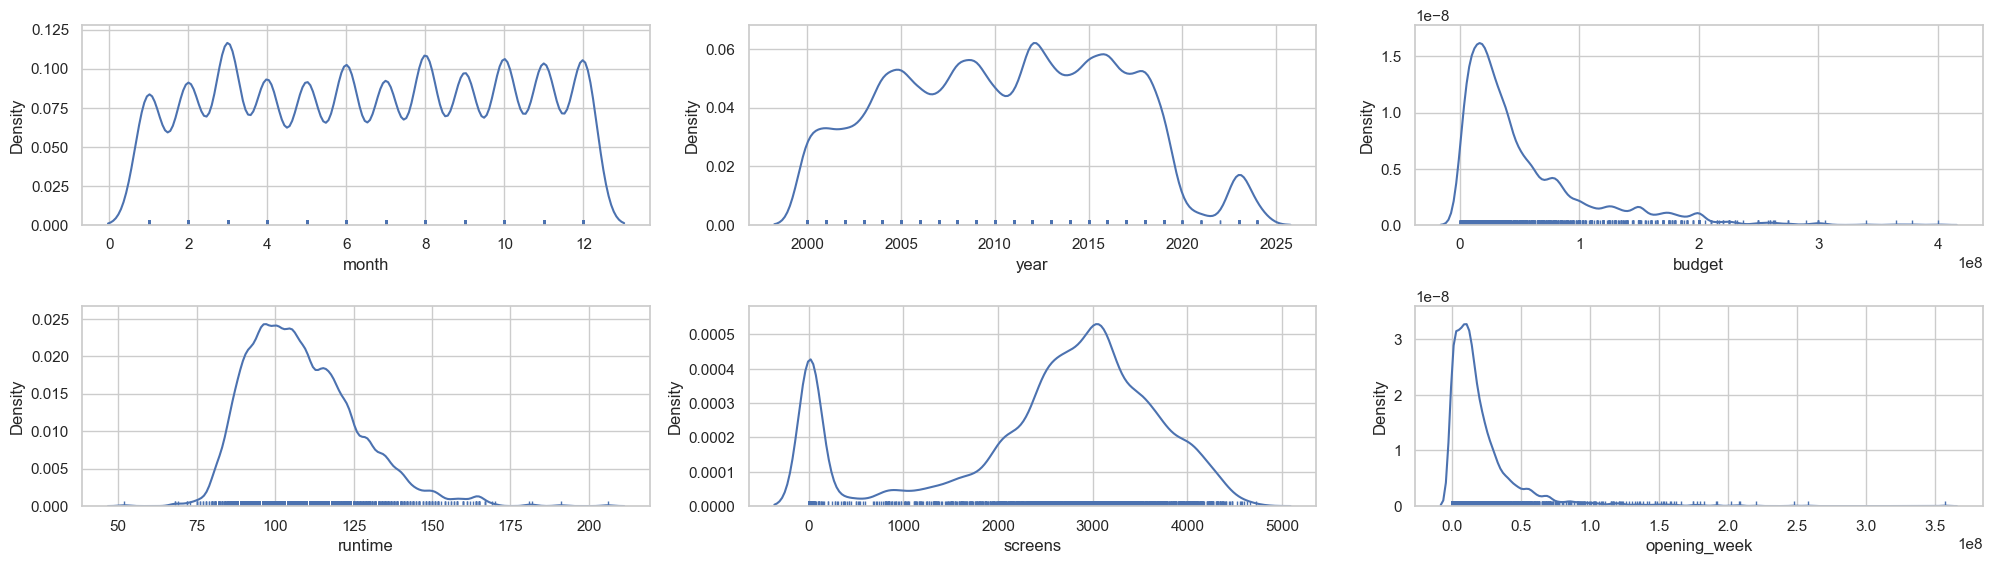

In [44]:
fig = plt.figure(figsize=(20, 25))
sns.set(style="whitegrid")
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 3, i + 1)
    sns.distplot(
        features_numerical.iloc[:, i].dropna(),
        rug=True,
        hist=False,
        kde_kws={"bw": 0.1},
        color="b",
    )
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()

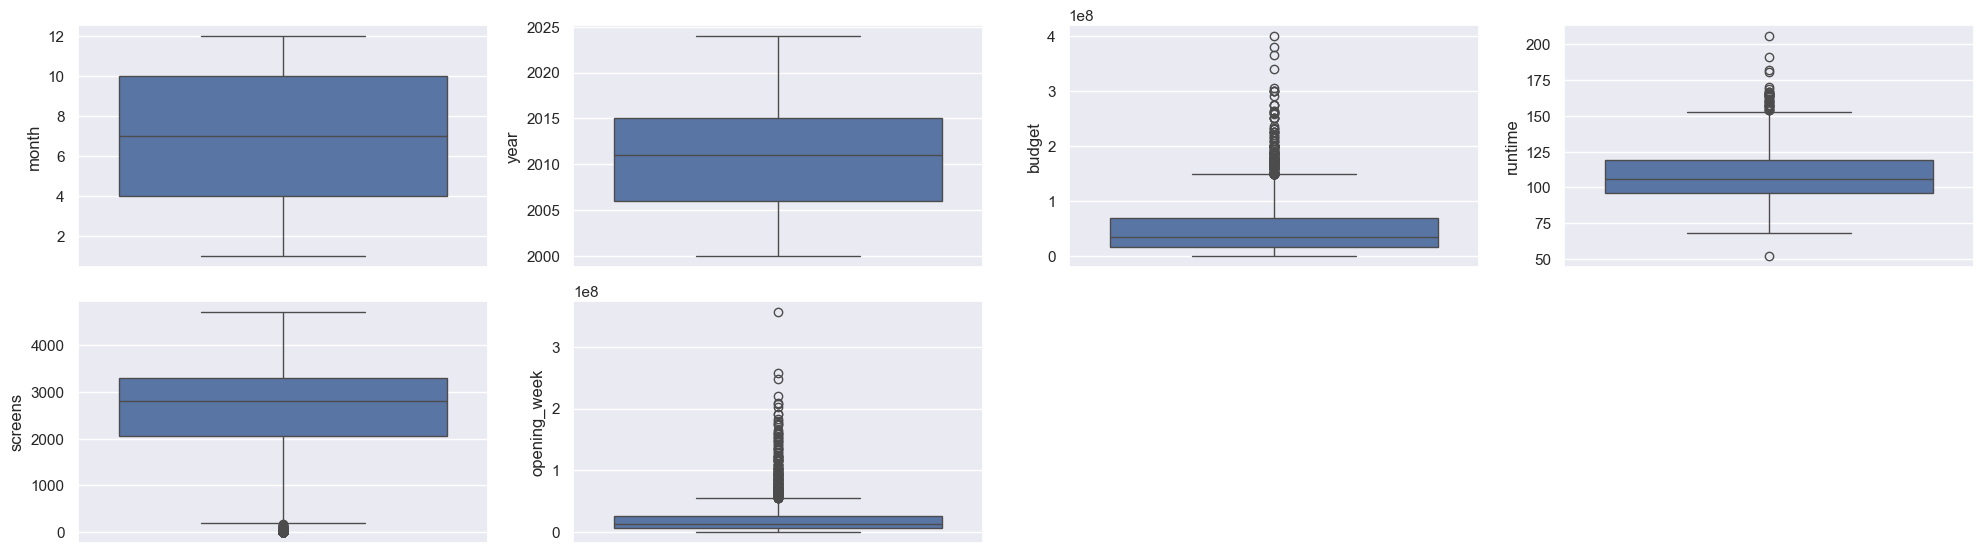

In [45]:
fig = plt.figure(figsize=(20, 25))
sns.set(style="darkgrid")
for i in range(len(features_numerical.columns)):
    fig.add_subplot(9, 4, i + 1)
    sns.boxplot(y=features_numerical.iloc[:, i].dropna())
plt.tight_layout()

In [46]:
outliers = df[["budget","runtime","screens","opening_week"]]

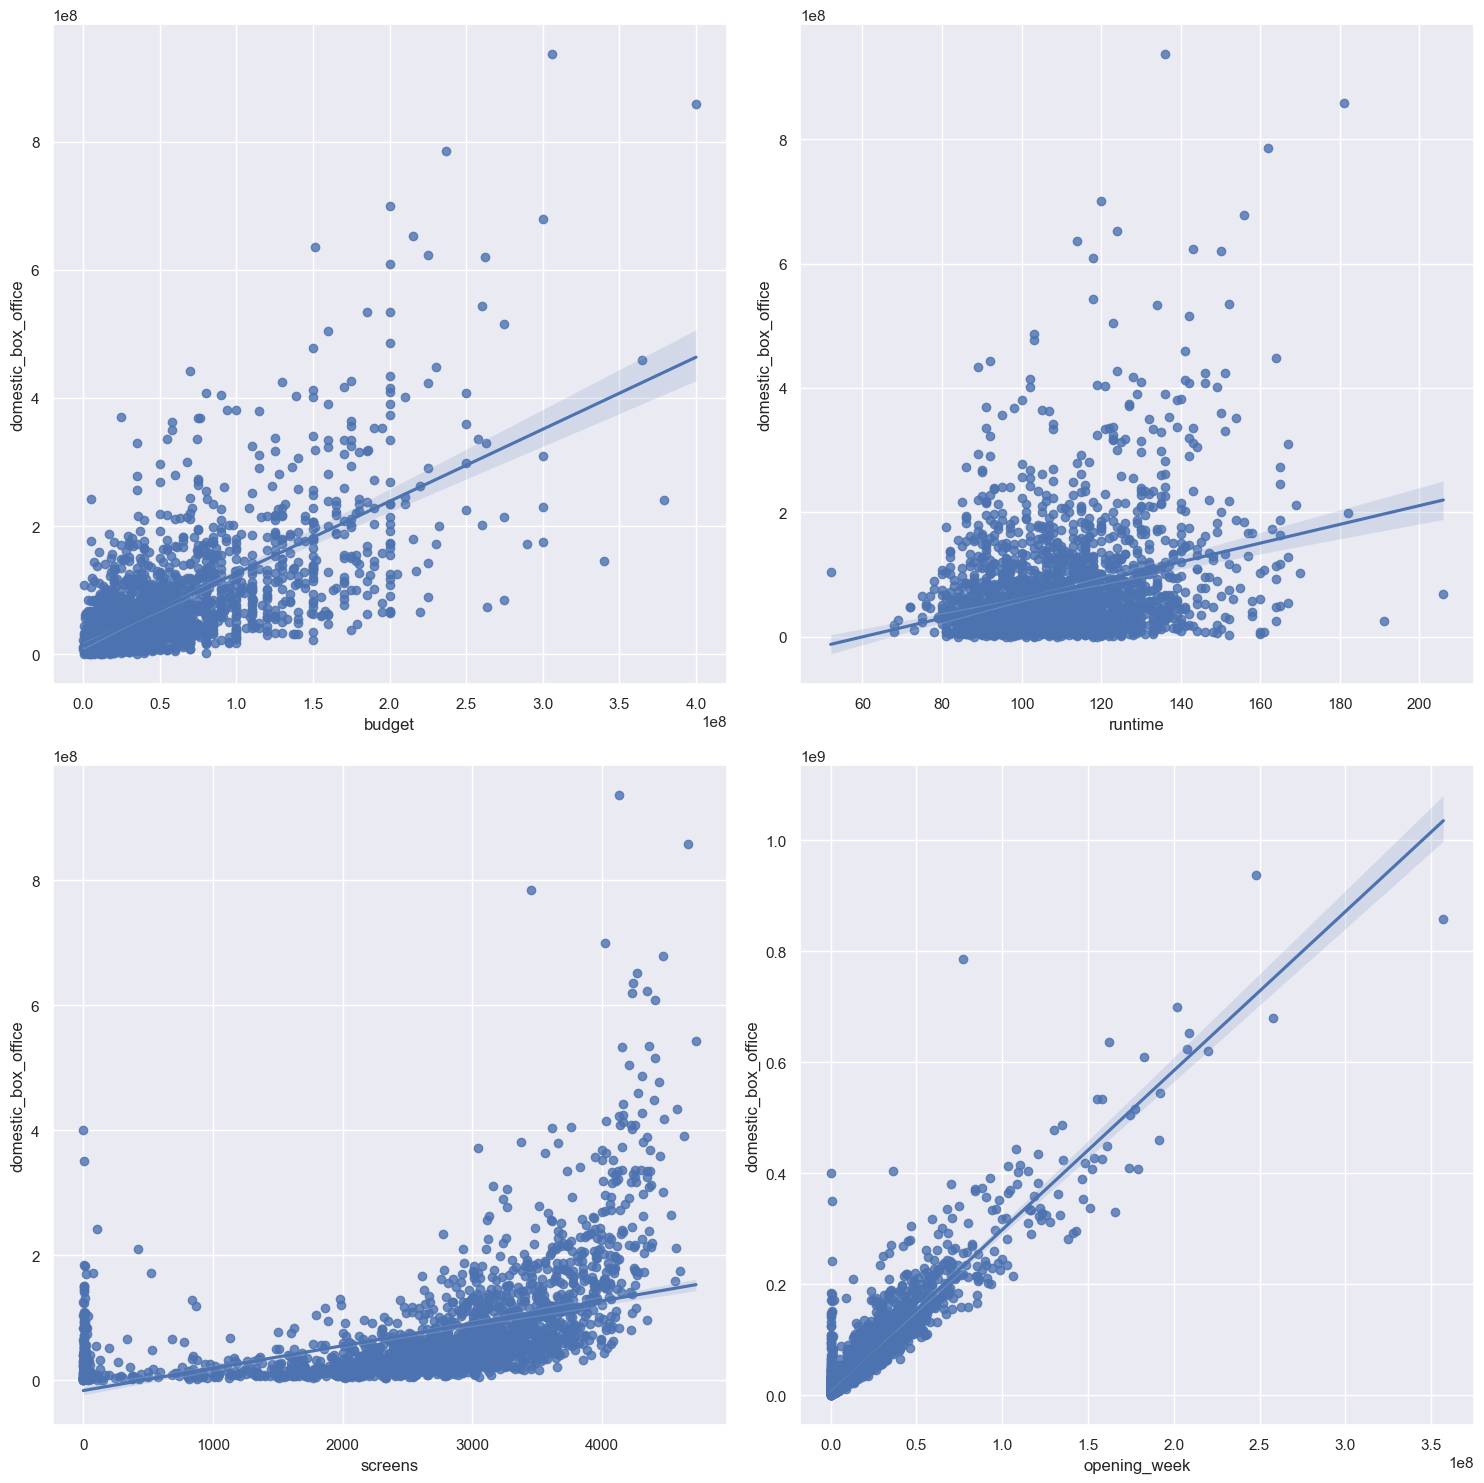

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for i, ax in enumerate(axes.flatten()):
    if i < len(outliers.columns):
        sns.regplot(x=outliers.iloc[:, i], y=df.domestic_box_office, ax=ax)

plt.tight_layout()
plt.show()

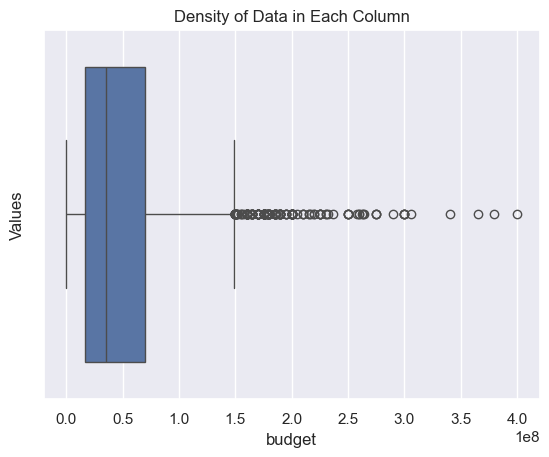

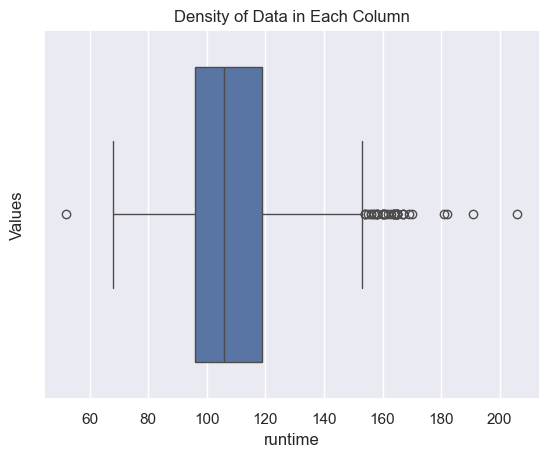

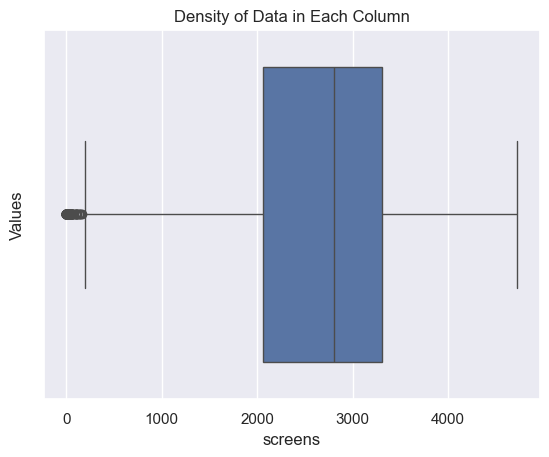

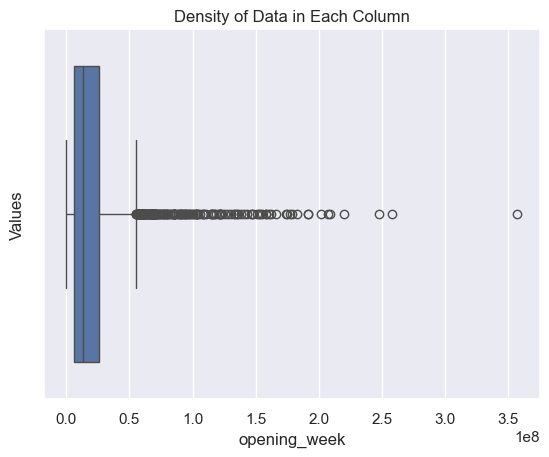

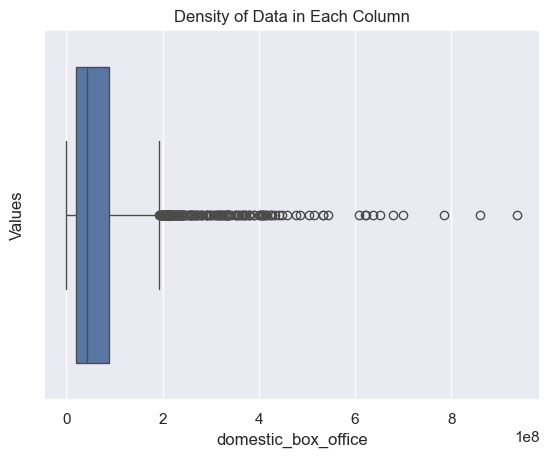

In [48]:


columns = ['budget', 'runtime', 'screens', 'opening_week', 'domestic_box_office']

for column in columns:
    sns.boxplot(x=column, data=df)
    plt.title('Density of Data in Each Column')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


2011
Number of movie:  93
2006
Number of movie:  105
2018
Number of movie:  128
2010
Number of movie:  105
2013
Number of movie:  122
2014
Number of movie:  113
2023
Number of movie:  54
2009
Number of movie:  132
2005
Number of movie:  125
2007
Number of movie:  98
2004
Number of movie:  120
2012
Number of movie:  158
2002
Number of movie:  74
2017
Number of movie:  112
2008
Number of movie:  130
2015
Number of movie:  131
2016
Number of movie:  138
2001
Number of movie:  76
2003
Number of movie:  81
2019
Number of movie:  92
2021
Number of movie:  9
2020
Number of movie:  12
2022
Number of movie:  2


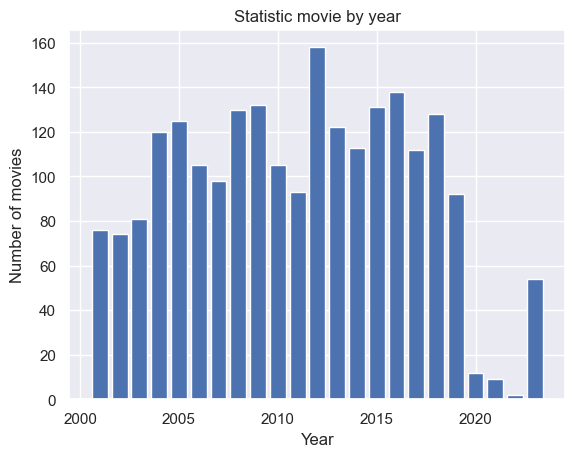

In [49]:
df = df[(df["year"] >= 2001) & (df["year"] <= 2023)]
years=df['year'].unique()
number_movie = []
for y in years:
    print(y)
    print("Number of movie: ",df[df["year"] == y]["movie_name"].count())
    number_movie.append(df[df['year']==y]['movie_name'].count())
plt.bar(years, number_movie)
plt.title("Statistic movie by year")
plt.xlabel("Year")
plt.ylabel("Number of movies")
plt.show()

worldwide_box_office
(0.0, 100000000.0]             1267
(100000000.0, 200000000.0]      415
(200000000.0, 300000000.0]      191
(300000000.0, 400000000.0]      111
(400000000.0, 500000000.0]       61
(500000000.0, 600000000.0]       38
(600000000.0, 700000000.0]       34
(700000000.0, 800000000.0]       29
(800000000.0, 900000000.0]       19
(900000000.0, 1000000000.0]       7
Name: count, dtype: int64


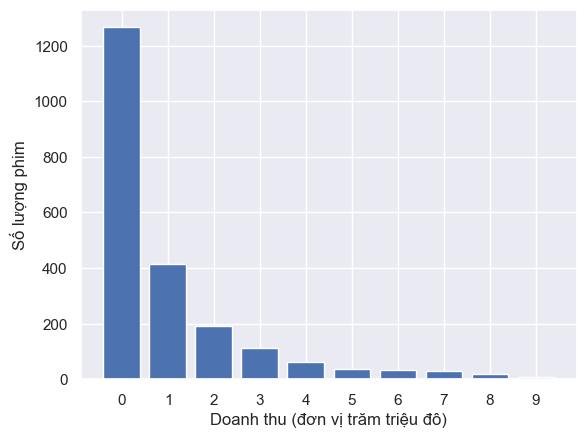

In [50]:
import matplotlib.ticker as mticker
from matplotlib.ticker import ScalarFormatter


bins = [
    0,
    1e8,
    2e8,
    3e8,
    4e8,
    5e8,
    6e8,
    7e8,
    8e8,
    9e8,
    10e8
]  

categories = pd.cut(df["worldwide_box_office"], bins)

revenue_counts = categories.value_counts()

print(revenue_counts)

plt.bar([str(cat) for cat in revenue_counts.index], revenue_counts)

plt.xlabel("Doanh thu (đơn vị trăm triệu đô)")
plt.ylabel("Số lượng phim")

plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))

plt.show()

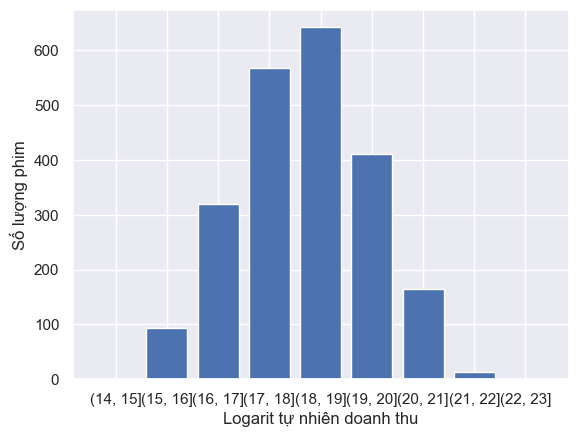

In [51]:
df["log_revenue"] = np.log(df["worldwide_box_office"])

log_bins = [
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
]  

log_categories = pd.cut(df["log_revenue"], log_bins)

log_revenue_counts = log_categories.value_counts()
log_revenue_counts = log_revenue_counts.sort_index()

plt.bar([str(cat) for cat in log_revenue_counts.index], log_revenue_counts)

plt.xlabel("Logarit tự nhiên doanh thu")
plt.ylabel("Số lượng phim")

plt.show()

<Figure size 1000x800 with 0 Axes>

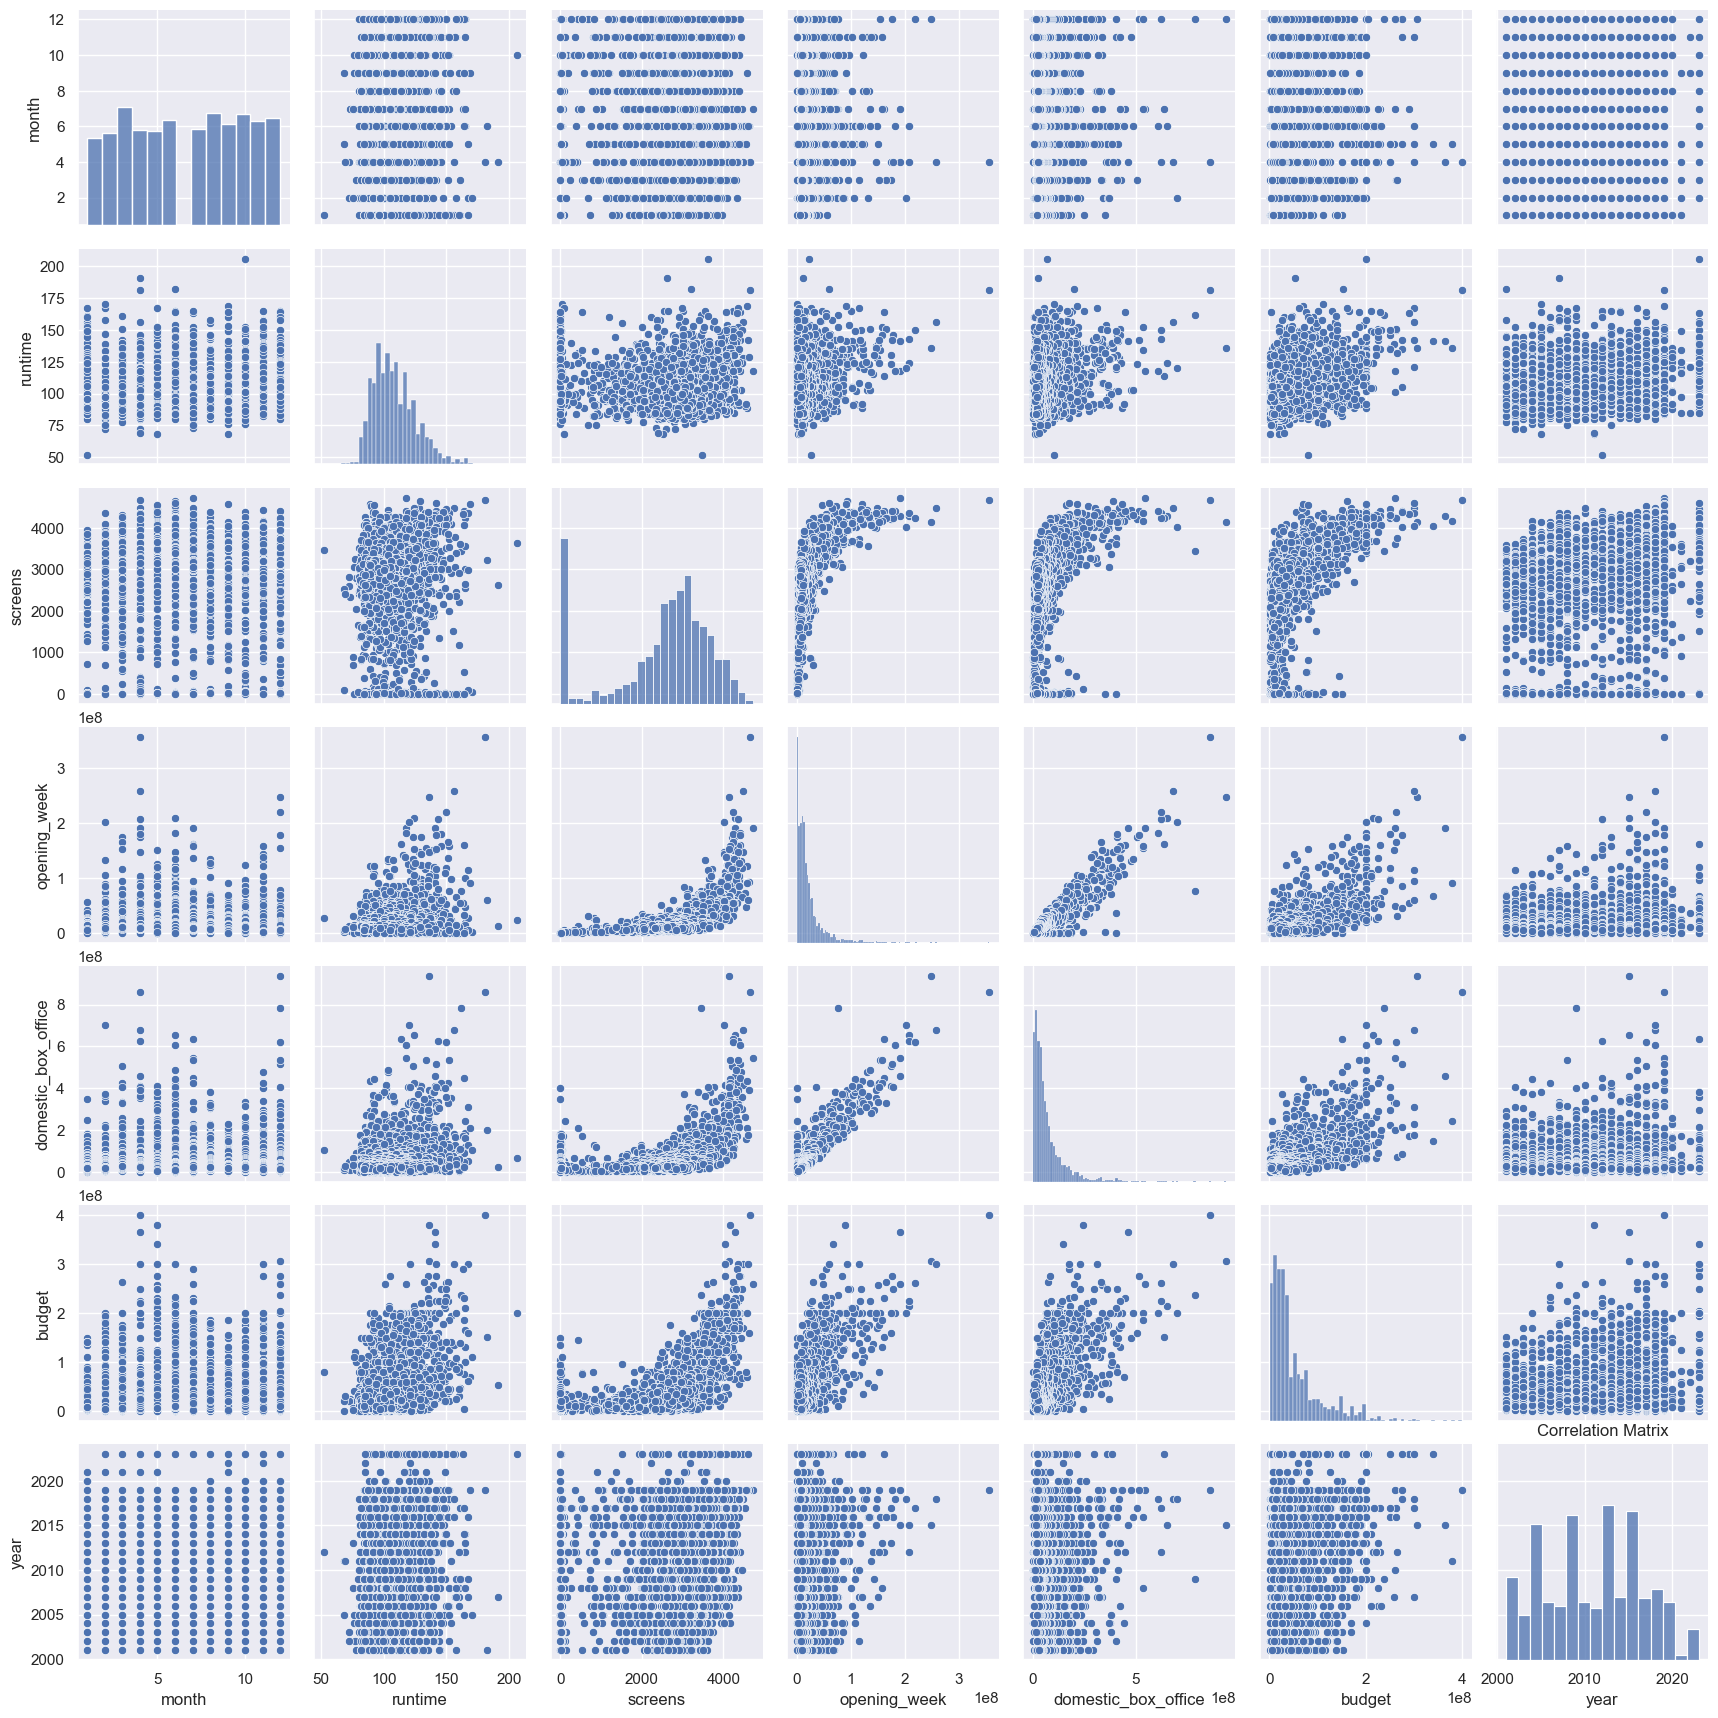

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "month",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "budget",
    "year",
]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.pairplot(df[columns])
plt.title("Correlation Matrix")
plt.show()

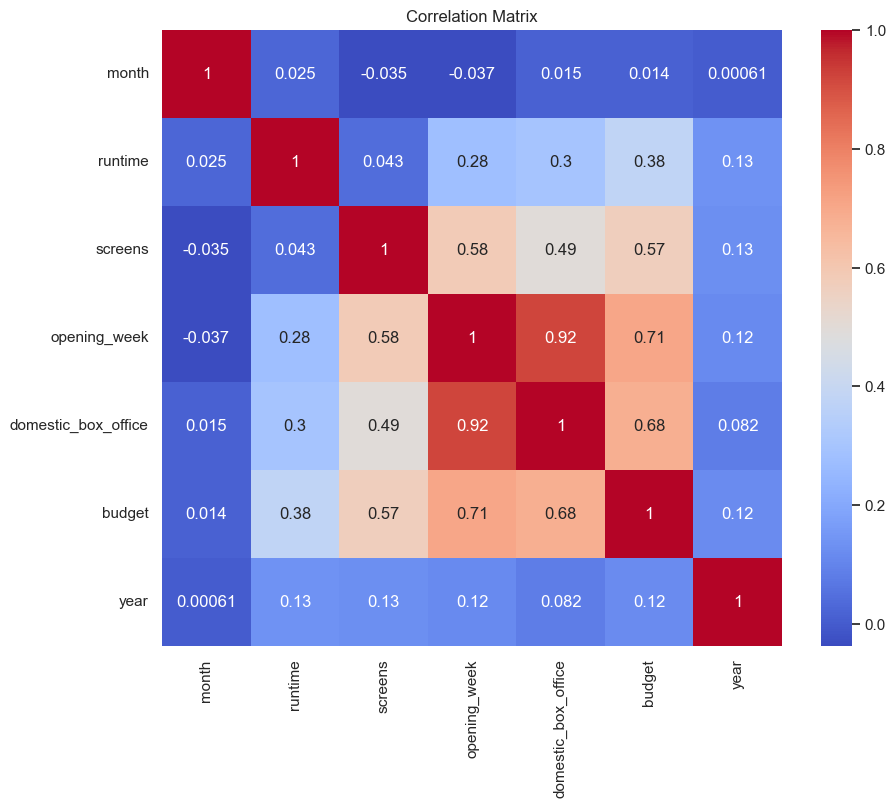

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    "month",
    "runtime",
    "screens",
    "opening_week",
    "domestic_box_office",
    "budget",
    "year",
]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

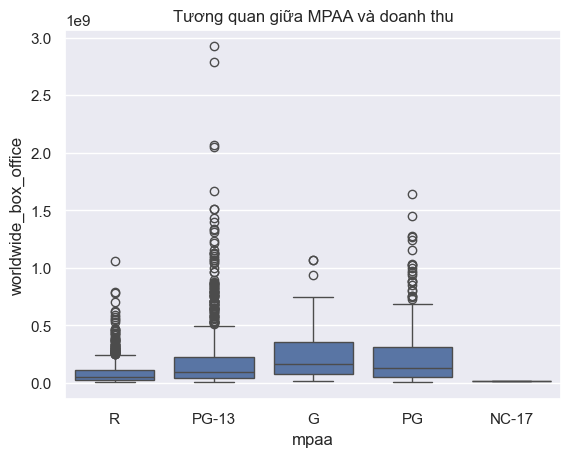

In [54]:
sns.boxplot(x="mpaa", y="worldwide_box_office", data=df)

# Đặt tiêu đề cho biểu đồ
plt.title("Tương quan giữa MPAA và doanh thu")

# Hiển thị biểu đồ
plt.show()